## Neural Network Tutorial ##

In [1]:
import torch 
import torch.nn as nn 

# Library to traverse graph 
import torch.nn.functional as F 

### Create a Model Class that inherits nn.Module ###

In [2]:
class Model(nn.Module): 
    # Input layer (4 features in the Iris dataset) --> Hidden Layer(s) [2 in this case]--> Output
    def __init__(self, in_features = 4, h1 = 6, h2 = 6, out_features = 3): 
        # fc = fully connected
        super().__init__() #instantiate our nn.Module
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    # Create function that moves everything forward (left to right)
    def forward(self, x): 
        # relu is an optimization function that returns max(0, sum)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [3]:
# Set your random state
    # makes the initial weights the same every time you redo this! 
torch.manual_seed(23)

nn_model = Model()
nn_model

Model(
  (fc1): Linear(in_features=4, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=6, bias=True)
  (out): Linear(in_features=6, out_features=3, bias=True)
)

### Importing Data and Training Model ###

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
flowers = pd.read_csv(url)
flowers

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [6]:
flowers[["variety"]] = flowers[["variety"]].replace({"Setosa":0.0, "Versicolor": 1.0, "Virginica":2.0})
flowers

/var/folders/t4/436mdj0s2_l4pq08n69r_53m0000gn/T/ipykernel_55925/467850967.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flowers[["variety"]] = flowers[["variety"]].replace({"Setosa":0.0, "Versicolor": 1.0, "Virginica":2.0})


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [7]:
# These are dataframes
X = flowers.drop("variety", axis = 1)
y = flowers[["variety"]]

# Convert to numpy arrays 
X = X.values
y = y.values

In [8]:
import sklearn 
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

In [10]:
""" Make these splits TENSORS """
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train).squeeze()
y_test = torch.LongTensor(y_test).squeeze()

In [11]:
""" Set the criterion of model to measure the error, 
how far off the predictions are from the data """

criterion = nn.CrossEntropyLoss()

""" Choose Adam Optimizer(Send yourself through and through and optimize weights),
and set our learning rate (If error doesn't go down after a bunch of iterations(epochs),
we want to lower our learning rate)"""


optimizer = torch.optim.Adam(nn_model.parameters(), lr = 0.01) # Parameters are the layers!

# if our error doesn't go down much when were running through, then were going to lower learning rate, the lower the longer, 

### Train it! ###

In [25]:
""" Epoch is sending all of our training data, through the network, ONCE! """

epochs = 1000

""" As we run the training data through, we want to keep track of our training error, 
as more data comes in we should know that it is learning or not depending on if the error goes up or down """

losses = []

for i in range(epochs): 
    # Go and get a prediction
    y_pred = nn_model.forward(X_train) # Get the predicted result, recall this is a class function you defined! 

    # Measure the ERROR! 
    loss = criterion(y_pred, y_train) # Predicted vs Actual 

    # Keep track of losses
    losses.append(loss.detach().numpy()) #.detach().numpy() just makes it a tensor

    if i % 10 == 0: 
        print(f"Epoch: {i}")
        print(f"Loss: {loss}")
        print("|--------------------------|")

    """ Back propagation ( take the error rate of forward propagation, and you feed it back through the network to fine tune the weights) """

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0
Loss: 0.0313006192445755
|--------------------------|
Epoch: 10
Loss: 0.030798515304923058
|--------------------------|
Epoch: 20
Loss: 0.030427081510424614
|--------------------------|
Epoch: 30
Loss: 0.03007945790886879
|--------------------------|
Epoch: 40
Loss: 0.029726112261414528
|--------------------------|
Epoch: 50
Loss: 0.02940106764435768
|--------------------------|
Epoch: 60
Loss: 0.029083527624607086
|--------------------------|
Epoch: 70
Loss: 0.029878852888941765
|--------------------------|
Epoch: 80
Loss: 0.028584133833646774
|--------------------------|
Epoch: 90
Loss: 0.028209345415234566
|--------------------------|
Epoch: 100
Loss: 0.02793596312403679
|--------------------------|
Epoch: 110
Loss: 0.027688033878803253
|--------------------------|
Epoch: 120
Loss: 0.02742508240044117
|--------------------------|
Epoch: 130
Loss: 0.027170075103640556
|--------------------------|
Epoch: 140
Loss: 0.02709212154150009
|--------------------------|
Epoch: 150
Lo

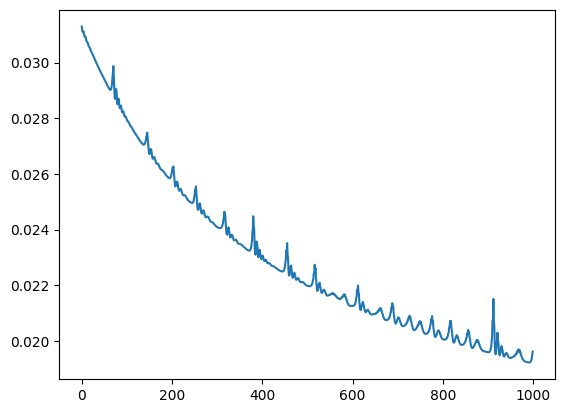

In [26]:
# Graph this out 

# If we DONT SEE THIS FLATTEN AT THE END WE CAN: 
    # Change the Learning Rate
    # Add more epochs!
plt.plot(range(epochs), losses)

### Evaluating the Model! ###

In [14]:
with torch.no_grad(): #Basically turn off back propogation for test set data
    y_eval = nn_model.forward(X_test)
    # Find the error between preds vs actuals 
    loss = criterion(y_eval, y_test)
loss # You want to compare this number with the training loss and see them be the same

tensor(0.1897)

In [27]:
correct = 0
nn_model.eval()
with torch.no_grad():
    for i, data in enumerate(X_test): 
        y_val = nn_model.forward(data)
    
        # What we predict vs what it is 
        print(f"{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}")

        # correct or not 
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f"Accuracy: {correct}/{len(X_test)}: {(correct/len(X_test)):2f} ")

1.) tensor([-10.2580,  -7.0939,  21.5220]) 	 2 	 2
2.) tensor([-8.2915, -4.1654, 14.9588]) 	 2 	 2
3.) tensor([-3.0071,  3.7041, -2.6776]) 	 1 	 1
4.) tensor([ 7.3506, -6.6961, -7.4880]) 	 0 	 0
5.) tensor([-10.9073,  -8.0609,  23.6891]) 	 2 	 2
6.) tensor([-3.0071,  3.7041, -2.6776]) 	 1 	 1
7.) tensor([ 8.4216, -7.8074, -7.9819]) 	 0 	 0
8.) tensor([-7.1800, -2.5102, 11.2494]) 	 2 	 2
9.) tensor([ 8.1268, -7.5008, -7.8460]) 	 0 	 0
10.) tensor([-3.0071,  3.7041, -2.6776]) 	 1 	 1
11.) tensor([-3.0071,  3.7041, -2.6776]) 	 1 	 1
12.) tensor([ 7.4857, -6.8347, -7.5504]) 	 0 	 0
13.) tensor([-12.9518, -11.1056,  30.5124]) 	 2 	 2
14.) tensor([ 8.2511, -7.6201, -7.9043]) 	 0 	 0
15.) tensor([ 8.8163, -8.2002, -8.1656]) 	 0 	 0
16.) tensor([-3.0071,  3.7041, -2.6776]) 	 2 	 1
17.) tensor([-3.0071,  3.7041, -2.6776]) 	 1 	 1
18.) tensor([-3.0071,  3.7041, -2.6776]) 	 1 	 1
19.) tensor([-16.0185, -15.6725,  40.7475]) 	 2 	 2
20.) tensor([ 8.4317, -7.8055, -7.9877]) 	 0 	 0
21.) tensor([-12.

### Evaluating New Data ###

In [16]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [17]:
# Feed it to the NN and get back the prediction

with torch.no_grad(): 
    print(nn_model(new_iris))


tensor([ 4.2093, -2.4584, -2.7611])


### Save and Load your Model ###

In [18]:
# Save the model, will make the files inside the same folder

torch.save(nn_model.state_dict(), 'first_iris_model.pt') # Save weights and biases of our model into a dictionary

In [19]:
# Load the model 

new_model = Model()
new_model.load_state_dict(torch.load('first_iris_model.pt'))

<All keys matched successfully>

In [20]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=6, bias=True)
  (out): Linear(in_features=6, out_features=3, bias=True)
)